## Klebtechnik Berechnungsübung Nr. 1
### Arbeiten mit Jupyter Notebooks
_jupyter notebooks_ können als interaktives Notizbuch verstanden werden. Tatsächlich sind solche Notebooks nicht nur zum Lernen sondern auch für den ingenieurpraktischen Alltag sehr sinnvoll. Man kann dabei leicht Auswertungen, Analysen und Dokumentation an einem Ort zusammenführen. Größere Programmcodes können zwar manchmal in Notebooks vorteilhaft entwickelt und getestet werden, diese werden dann aber doch meist "klassisch" als Python\-Module gespeichert. Diese Python\-Module können dann aber wieder in jupyter notebooks geladen werden. Damit kann man Programmcode \(im Hintergrund als Modul\) und Auswertung \(im Notebook\) trennen. 

#### Zellstruktur
Die Notebooks bestehen aus einzelnen Zellen. Diese Zellen können entweder Text oder Programmcode enthalten. Der Programmcode einer Zelle kann mit "Strg + Enter" ausgeführt werden. 

Führen Sie die folgenden Zellen in verschiedener Reihenfolge aus, um das Verhalten kennenzulernen.


In [1]:
print("Hallo Welt")

Hallo Welt


In [2]:
a = 10
b = 2

In [3]:
print(a*b)

20


## Definieren der benötigten Funktionen

Führen Sie die folgende Zelle unverändert aus, um die im Folgenden für die Analyse von Klebverbindungen benötigten Funktionen zu definieren. Es wird damit das Sandwich-Modell definiert:
  * _Weißgraeber, P., Stein, N., & Becker, W. (2014). A general sandwich-type model for adhesive joints with composite adherends. International Journal of Adhesion and Adhesives, 55, 56-63._

In [4]:
import Sandwich
import numpy as np
import Materials

# Berechnungen verschiedener Klebverbindungen

Im Folgenden werden mit dem Sandwich-Modell einige verschiedene Klebverbindungen analysieren. Nutzen Sie dabei das Notebook, um die Aufgaben zu bearbeiten aber auch um mit anderen Werten "rumzuspielen". Sie können dazu auch Zellen kopieren und dann verändern. 

## Vorbemerkungen

Bitte verwenden Sie für die Lösungen die folgenden Materialkennwerte::<br>
Stahl:    $E = 210\,\mathrm{GPa}$, $\nu = 0,3$<br>
Aluminum: $E = 70\,\mathrm{GPa}$, $\nu = 0,33$<br>
Epoxy:     $E = 3,9\,\mathrm{GPa}$, $\nu = 0,36$<br>
CFK: $E_{11}=135\,\mathrm{GPa}$, $E_{22}=10\,\mathrm{GPa}$, $G_{12}=5\,\mathrm{GPa}$, $G_{23}=3,846\,\mathrm{GPa}$, $\nu_{12}=0,27$, $\nu_{23}=0,3$

## Aufgabe 1
Untersuchen Sie die Schub- und Schälspannungen in einer einschnittigen Überlappungsfügung mit einer Überlappungslänge von 25 mm unter einer Last von $N_{11} = N_{22}=2\,\mathrm{kN}$, $Q_{11} = Q_{22}=22\,\mathrm{N}$ und $M_{11} = - M_{22}=2,2\,\mathrm{kN/mm}$. <br>Die beiden Fügepartner mit einer Dicke von h = 2 mm sind aus Stahl. <br>Als Kleber wurde ein Epoxy mit einer Klebschichtdicke von 0,2 mm eingesetzt. 
<br>Die Breite der Fügung beträgt b = 10 mm.


In [ ]:
# Geometrie der Sandwich-Layer
h1 = 
h2 = 
t = 
b = 
L0 = 

#Werkstoffeigenschaften Adherend

E_Adherend = 
nu_Adherend = 
Adherend = Materials.Material_Adherend("Adherend",E_Adherend,nu_Adherend)

# ABDMatrix des Adherend
Adherend.computeABD_isotrop(h1)
Adherend2 = Materials.Material_Adherend("Adherend2",E_Adherend,nu_Adherend)
Adhernd2 =Adherend2.computeABD_isotrop(h2)

#Werkstoffeigenschaften Adhesive
E_Adhesive = 
nu_Adhesive = 
Adhesive = Materials.Material_Adhesive("AVR", E_Adhesive, nu_Adhesive)

# Schnittkräfte 
#SF = [N11, V11, M11,   N12, V12, M12,   N21, V21, M21,   N22, V22, M22]
SF = [2000 / b, 22 / b, 2200 / b,   0 / b, 0 / b, 0 / b,   0 / b, 0 / b, 0 / b,   2000 / b, 22 / b, -2200 / b,]

# Sandwich-Layer definieren (Höhe Adherend1 Höhe Adhernd2, Höhe Klebschicht, Überlappungslänge, Breite, Schnittkräfte, Adherend1, Adherend2, Adhesive)
Sand1 = Sandwich.Sandwich_Layer(h1, h2, t, L0, b, SF, Adherend, Adherend2, Adhesive)

# Berechnen der Spannungverteilung (Schnittkräfte, Überlappungslänge, Point of interest, Seite des Point of interest (True= Links; False= Rechts), Daten überschreiben (True, False))
Sand1.linearelasticsandwich_stress(SF, L0, 0, True, True)

#Ausgabe der Spannungsverteilung als plot
Sand1.Sol.plot_stress()

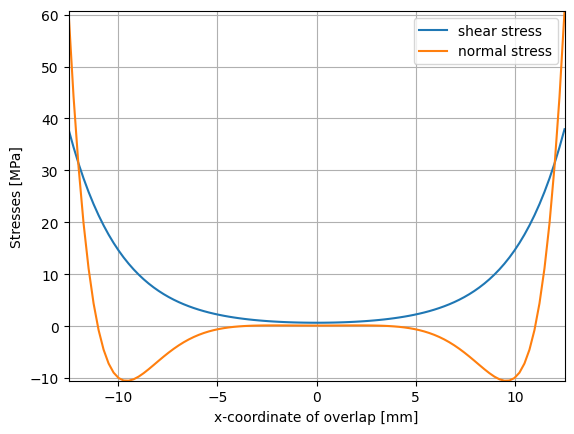

In [13]:
# Geometrie der Sandwich-Layer
h1 = 2.
h2 = 2.
t = 0.2
b = 10.
L0 = 25.

#Werkstoffeigenschaften Adherend

E_Adherend = 210000
nu_Adherend = 0.3
Adherend = Materials.Material_Adherend("Adherend",E_Adherend,nu_Adherend)

# ABDMatrix des Adherend
Adherend.computeABD_isotrop(h1)
Adherend2 = Materials.Material_Adherend("Adherend2",E_Adherend,nu_Adherend)
Adhernd2 =Adherend2.computeABD_isotrop(h2)

#Werkstoffeigenschaften Adhesive
E_Adhesive = 3900
nu_Adhesive = 0.36
Adhesive = Materials.Material_Adhesive("AVR", E_Adhesive, nu_Adhesive)

# Schnittkräfte 
#SF = [N11, V11, M11,   N12, V12, M12,   N21, V21, M21,   N22, V22, M22]
SF = [2000 / b, 22 / b, 2200 / b,   0 / b, 0 / b, 0 / b,   0 / b, 0 / b, 0 / b,   2000 / b, 22 / b, -2200 / b,]

# Sandwich-Layer definieren (Höhe Adherend1 Höhe Adhernd2, Höhe Klebschicht, Überlappungslänge, Breite, Schnittkräfte, Adherend1, Adherend2, Adhesive)
Sand1 = Sandwich.Sandwich_Layer(h1, h2, t, L0, b, SF, Adherend, Adherend2, Adhesive)

# Berechnen der Spannungverteilung (Schnittkräfte, Überlappungslänge, Point of interest, Seite des Point of interest (True= Links; False= Rechts), Daten überschreiben (True, False))
Sand1.linearelasticsandwich_stress(SF, L0, 0, True, True)

#Ausgabe der Spannungsverteilung als plot
Sand1.Sol.plot_stress()

## Aufgabe 2
Untersuchen Sie einen aufgeklebten Doppler, bei welchem die Grundplatte unter einer Zugbelastung von 3 kN steht. Nutzen Sie die gleichen Parameter wie in Aufgabe 1.<br>
Diskutieren Sie das Ergebnis.<br>
Wie ändern sich die Spannungen in der Klebschicht, wenn statt einem Stahlblech ein Aluminiumblech aufgeklebt wird?<br>
Überlegen Sie, welche Vor- und Nachteile das hat.<br>


In [ ]:
h1 = 
h2 = 
t = 
b = 
L0 = 

#Werkstoffeigenschaften Adherend1

E_Adherend1 = 
nu_Adherend1 = 
Adherend1 = Materials.Material_Adherend("Adherend", E_Adherend, nu_Adherend)

# ABDMatrix des Adherend
Adherend1.computeABD_isotrop(h1)

#Werkstoffeigenschaften Adherend2
E_Adherend2 = 
nu_Adherend2 = 
Adherend2 = Materials.Material_Adherend("Adherend", E_Adherend2, nu_Adherend2)

# ABDMatrix des Adherend
Adherend2.computeABD_isotrop(h2)


#Werkstoffeigenschaften Adhesive
E_Adhesive = 
nu_Adhesive = 
Adhesive = Materials.Material_Adhesive("AVR", E_Adhesive, nu_Adhesive)

# Schnittkräfte 
#SF = [N11, V11, M11,   N12, V12, M12,   N21, V21, M21,   N22, V22, M22]
SF = [0, 0 , 0,   0, 0, 0,   3000 / b , 0, 0,   3000 / b, 0, 0]

# Sandwich-Layer definieren (Höhe Adherend1 Höhe Adhernd2, Höhe Klebschicht, Überlappungslänge, Breite, Schnittkräfte, Adherend1, Adherend2, Adhesive)
Sand1 = Sandwich.Sandwich_Layer(h1, h2, t, L0, b, SF, Adherend1, Adherend1, Adhesive)
Sand2 = Sandwich.Sandwich_Layer(h1, h2, t, L0, b, SF, Adherend2, Adherend1, Adhesive)

# Berechnen der Spannungverteilung (Schnittkräfte, Überlappungslänge, Point of interest, Seite des Point of interest (True= Links; False= Rechts), Daten überschreiben (True, False))
Sand1.linearelasticsandwich_stress(SF, L0, 0, True, True)
Sand2.linearelasticsandwich_stress(SF, L0, 0, True, True)
#Ausgabe der Spannungsverteilung als plot
Sand1.Sol.plot_multi_stress(Sand2.Sol.dx, Sand2.Sol.tauxz, Sand2.Sol.sigzz)


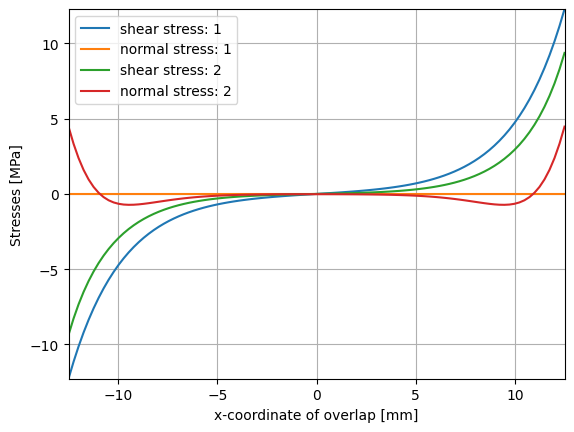

In [14]:
# Geometrie der Sandwich-Layer
h1 = 2.
h2 = 2.
t = 0.2
b = 10.
L0 = 25.

#Werkstoffeigenschaften Adherend1

E_Adherend1 = 210000
nu_Adherend1 = 0.3
Adherend1 = Materials.Material_Adherend("Adherend", E_Adherend, nu_Adherend)

# ABDMatrix des Adherend
Adherend1.computeABD_isotrop(h1)

#Werkstoffeigenschaften Adherend2
E_Adherend2 = 70000
nu_Adherend2 = 0.33
Adherend2 = Materials.Material_Adherend("Adherend", E_Adherend2, nu_Adherend2)

# ABDMatrix des Adherend
Adherend2.computeABD_isotrop(h2)


#Werkstoffeigenschaften Adhesive
E_Adhesive = 3900
nu_Adhesive = 0.36
Adhesive = Materials.Material_Adhesive("AVR", E_Adhesive, nu_Adhesive)

# Schnittkräfte 
#SF = [N11, V11, M11,   N12, V12, M12,   N21, V21, M21,   N22, V22, M22]
SF = [0, 0 , 0,   0, 0, 0,   3000 / b , 0, 0,   3000 / b, 0, 0]

# Sandwich-Layer definieren (Höhe Adherend1 Höhe Adhernd2, Höhe Klebschicht, Überlappungslänge, Breite, Schnittkräfte, Adherend1, Adherend2, Adhesive)
Sand1 = Sandwich.Sandwich_Layer(h1, h2, t, L0, b, SF, Adherend1, Adherend1, Adhesive)
Sand2 = Sandwich.Sandwich_Layer(h1, h2, t, L0, b, SF, Adherend2, Adherend1, Adhesive)

# Berechnen der Spannungverteilung (Schnittkräfte, Überlappungslänge, Point of interest, Seite des Point of interest (True= Links; False= Rechts), Daten überschreiben (True, False))
Sand1.linearelasticsandwich_stress(SF, L0, 0, True, True)
Sand2.linearelasticsandwich_stress(SF, L0, 0, True, True)
#Ausgabe der Spannungsverteilung als plot
Sand1.Sol.plot_multi_stress(Sand2.Sol.dx, Sand2.Sol.tauxz, Sand2.Sol.sigzz)


## Aufgabe 3
Eine zweischnittige Verbindung kann abgebildet werden, wenn die Biege- und Schubsteifigkeit eines Fügeteils als unendlich (bzw. mit einem sehr hohen Wert) angenommen wird. Warum?<br>
Untersuchen Sie die Spannungen in einer zweischnittigen Verbindung, die der aus Aufgabe 1 entspricht. Halbieren Sie dazu die Dicken der Fügeteile, um der Symmetrie zu entsprechen.<br>
Wie verändern sich die Spannungen?<br>

In [ ]:
# Geometrie der Sandwich-Layer
h1 = 
h2 = 
t = 
b = 
L0 = 

#Werkstoffeigenschaften Adherend1

E_Adherend1 = 
nu_Adherend1 = 
Adherend1 = Materials.Material_Adherend("Adherend", E_Adherend, nu_Adherend)

# ABDMatrix des Adherend
Adherend1.computeABD_isotrop(h1)

#Werkstoffeigenschaften Adherend2
E_Adherend2 = 
nu_Adherend2 = 
Adherend2 = Materials.Material_Adherend("Adherend", E_Adherend2, nu_Adherend2)

# ABDMatrix des Adherend
Adherend2.computeABD_isotrop(h2)
# Die Funktion computeABD_isotrop gibt Arrays mit folgenden Einträgen zurück: [A11, B11, D11, A55, k]
# Da bei Python der erste Eintrag eines Array mit dem Index "0" angegeben wird, 
# sind die Biegesteifigkeit D11 und die Schubsteifigkeit A55 die Einträge "2" und "3" des Arrays
Adherend2.M[2] = 
Adherend2.M[3] = 

#Werkstoffeigenschaften Adhesive
E_Adhesive = 
nu_Adhesive = 
Adhesive = Materials.Material_Adhesive("AVR", E_Adhesive, nu_Adhesive)

# Schnittkräfte 

#SF = [N11, V11, M11,   N12, V12, M12,   N21, V21, M21,   N22, V22, M22]
SF = [1000 / b , 0, 0,   0, 0, 0,   0, 0, 0,   1000 / b, 0, 0,]

# Sandwich-Layer definieren (Höhe Adherend1 Höhe Adhernd2, Höhe Klebschicht, Überlappungslänge, Breite, Schnittkräfte, Adherend1, Adherend2, Adhesive)
Sand1 = Sandwich.Sandwich_Layer(h1, h2, t, L0, b, SF, Adherend1, Adherend2, Adhesive)

# Berechnen der Spannungverteilung (Schnittkräfte, Überlappungslänge, Point of interest, Seite des Point of interest (True= Links; False= Rechts), Daten überschreiben (True, False))
Sand1.linearelasticsandwich_stress(SF, L0, 0, True, True)

#Ausgabe der Spannungsverteilung als plot
Sand1.Sol.plot_stress()
#Sand1.Sol.plot_multi_stress(Sand2.Sol.dx, Sand2.Sol.tauxz, Sand2.Sol.sigzz)

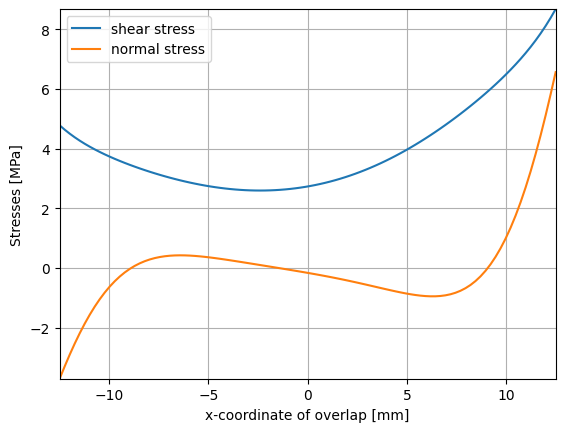

In [ ]:
# Geometrie der Sandwich-Layer
h1 = 2.
h2 = 1.
t = 0.2
b = 10.
L0 = 25.

#Werkstoffeigenschaften Adherend1

E_Adherend1 = 210000
nu_Adherend1 = 0.3
Adherend1 = Materials.Material_Adherend("Adherend", E_Adherend, nu_Adherend)

# ABDMatrix des Adherend
Adherend1.computeABD_isotrop(h1)

#Werkstoffeigenschaften Adherend2
E_Adherend2 = 210000
nu_Adherend2 = 0.3
Adherend2 = Materials.Material_Adherend("Adherend", E_Adherend2, nu_Adherend2)

# ABDMatrix des Adherend
Adherend2.computeABD_isotrop(h2)
# Die Funktion computeABD_isotrop gibt Arrays mit folgenden Einträgen zurück: [A11, B11, D11, A55, k]
# Da bei Python der erste Eintrag eines Array mit dem Index "0" angegeben wird, 
# sind die Biegesteifigkeit D11 und die Schubsteifigkeit A55 die Einträge "2" und "3" des Arrays
Adherend2.M[2] = 9999999999
Adherend2.M[3] = 9999999999

#Werkstoffeigenschaften Adhesive
E_Adhesive = 3900
nu_Adhesive = 0.36
Adhesive = Materials.Material_Adhesive("AVR", E_Adhesive, nu_Adhesive)

# Schnittkräfte 

#SF = [N11, V11, M11,   N12, V12, M12,   N21, V21, M21,   N22, V22, M22]
SF = [1000 / b , 0, 0,   0, 0, 0,   0, 0, 0,   1000 / b, 0, 0,]

# Sandwich-Layer definieren (Höhe Adherend1 Höhe Adhernd2, Höhe Klebschicht, Überlappungslänge, Breite, Schnittkräfte, Adherend1, Adherend2, Adhesive)
Sand1 = Sandwich.Sandwich_Layer(h1, h2, t, L0, b, SF, Adherend1, Adherend2, Adhesive)

# Berechnen der Spannungverteilung (Schnittkräfte, Überlappungslänge, Point of interest, Seite des Point of interest (True= Links; False= Rechts), Daten überschreiben (True, False))
Sand1.linearelasticsandwich_stress(SF, L0, 0, True, True)

#Ausgabe der Spannungsverteilung als plot
Sand1.Sol.plot_stress()
#Sand1.Sol.plot_multi_stress(Sand2.Sol.dx, Sand2.Sol.tauxz, Sand2.Sol.sigzz)

## Aufgabe 4
Wie ändert sich die maximale Schubspannung in der einschnittigen Fügung aus Aufgabe 1 in Abhängigkeit von der Überlappungslänge?<br>

In [ ]:

# Geometrie der Sandwich-Layer
h1 = 
h2 = 
t =  
b = 
L0 = 

#Werkstoffeigenschaften Adherend

E_Adherend = 
nu_Adherend = 
Adherend1 = Materials.Material_Adherend("Adherend",E_Adherend,nu_Adherend)

# ABDMatrix des Adherend
Adherend1.computeABD_isotrop(h1)

#Werkstoffeigenschaften Adherend2

Adherend2 = Materials.Material_Adherend("Adherend",E_Adherend,nu_Adherend)

# ABDMatrix des Adherend
Adherend2.computeABD_isotrop(h2)

#Werkstoffeigenschaften Adhesive
E_Adhesive = 
nu_Adhesive = 
Adhesive = Materials.Material_Adhesive("AVR", E_Adhesive, nu_Adhesive)

# Schnittkräfte 
#SF = [N11, V11, M11,   N12, V12, M12,   N21, V21, M21,   N22, V22, M22]
SF = [2000 / b, 22 / b, 2200 / b,   0 / b, 0 / b, 0 / b,   0 / b, 0 / b, 0 / b,   2000 / b, 22 / b, -2200 / b,]

# Sandwich-Layer definieren (Höhe Adherend1 Höhe Adhernd2, Höhe Klebschicht, Überlappungslänge, Breite, Schnittkräfte, Adherend1, Adherend2, Adhesive)
Sand1 = Sandwich.Sandwich_Layer(h1, h2, t, L0, b, SF, Adherend1, Adherend2, Adhesive)

# Vektor mit unterschiedliche Überlappungslängen definieren
L_linspace=np.linspace(10,100,90)

# Randspannung in Abhängikeit der Überlappungslänge berechnen
Sand1.edge_stress(L_linspace)

#Ausgabe der Spannung in Abhängigkeit der Überlappungslänge als plot
Sand1.Sol.plot_stress_edge("tauxz")

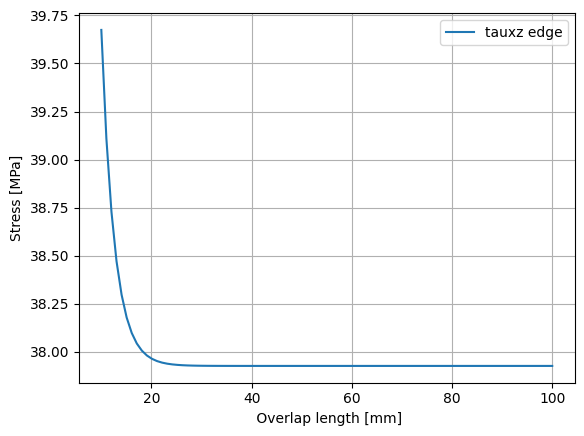

In [23]:

# Geometrie der Sandwich-Layer
h1 = 2.
h2 = 2.
t = 0.2
b = 10.
L0 = 25.

#Werkstoffeigenschaften Adherend

E_Adherend = 210000
nu_Adherend = 0.3
Adherend1 = Materials.Material_Adherend("Adherend",E_Adherend,nu_Adherend)

# ABDMatrix des Adherend
Adherend1.computeABD_isotrop(h1)

#Werkstoffeigenschaften Adherend2

Adherend2 = Materials.Material_Adherend("Adherend",E_Adherend,nu_Adherend)

# ABDMatrix des Adherend
Adherend2.computeABD_isotrop(h2)

#Werkstoffeigenschaften Adhesive
E_Adhesive = 3900
nu_Adhesive = 0.36
Adhesive = Materials.Material_Adhesive("AVR", E_Adhesive, nu_Adhesive)

# Schnittkräfte 
#SF = [N11, V11, M11,   N12, V12, M12,   N21, V21, M21,   N22, V22, M22]
SF = [2000 / b, 22 / b, 2200 / b,   0 / b, 0 / b, 0 / b,   0 / b, 0 / b, 0 / b,   2000 / b, 22 / b, -2200 / b,]

# Sandwich-Layer definieren (Höhe Adherend1 Höhe Adhernd2, Höhe Klebschicht, Überlappungslänge, Breite, Schnittkräfte, Adherend1, Adherend2, Adhesive)
Sand1 = Sandwich.Sandwich_Layer(h1, h2, t, L0, b, SF, Adherend1, Adherend2, Adhesive)

# Vektor mit unterschiedliche Überlappungslängen definieren
L_linspace=np.linspace(10,100,90)

# Randspannung in Abhängikeit der Überlappungslänge berechnen
Sand1.edge_stress(L_linspace)

#Ausgabe der Spannung in Abhängigkeit der Überlappungslänge als plot
Sand1.Sol.plot_stress_edge("tauxz")

## Zusatzaufgabe 5
Berechnen Sie die Spannungen in der Klebschicht eines aufgeklebten Dopplers (wie in Aufgabe 2), wenn ein [90°/0°] oder ein [0°/90°] CFK-Laminat aufgeklebt wird.

Die Material-Arrays `M_oben` und `M_unten` müssen die Einträge `[A11, B11, D11, A55, k]` enthalten.

Nutzen Sie zur Berechnung von A11, B11 und D11 des Dopplers das Onlinetool unter "https://abdcomposites.com/". Die Dicke der beiden Schichten soll jeweils 1 mm betragen.

Der Eintrag für A55 entspricht für ein [90°/0°]- und [0°/90°]-Laminat mit identischen Schichtdicken dem arithmetischen Mittel aus $G_{12}$ und $G_{23}$ multipliziert mit der Laminatdicke.

Nehmen Sie als Schubkorrekturfaktor für beide Konfigurationen $k = 0,86$ an.


In [ ]:
# Geometrie der Sandwich-Layer
h1 = 
h2 = 
t = 
b = 
L0 = 

#Werkstoffeigenschaften Adherend1

E_Adherend1 = 
nu_Adherend1 = 
Adherend1 = Materials.Material_Adherend("Adherend", E_Adherend, nu_Adherend)

# 0/90 Doppler:
# ABDMatrix des Adherend
Adherend1.M = [A11, B11, D11, A55, k]

#Werkstoffeigenschaften Adherend2

Adherend2 = Materials.Material_Adherend("Adherend", E_Adherend1, nu_Adherend1)

# ABDMatrix des Adherend
Adherend2.computeABD_isotrop(h2)


#Werkstoffeigenschaften Adhesive
E_Adhesive = 3900
nu_Adhesive = 0.36
Adhesive = Materials.Material_Adhesive("AVR", E_Adhesive, nu_Adhesive)

# Schnittkräfte 
#SF = [N11, V11, M11,   N12, V12, M12,   N21, V21, M21,   N22, V22, M22]
SF = [0, 0 , 0,   0, 0, 0,   3000 / b , 0, 0,   3000 / b, 0, 0]

# Sandwich-Layer definieren (Höhe Adherend1 Höhe Adhernd2, Höhe Klebschicht, Überlappungslänge, Breite, Schnittkräfte, Adherend1, Adherend2, Adhesive)
Sand1 = Sandwich.Sandwich_Layer(h1, h2, t, L0, b, SF, Adherend1, Adherend2, Adhesive)

# Berechnen der Spannungverteilung (Schnittkräfte, Überlappungslänge, Point of interest, Seite des Point of interest (True= Links; False= Rechts), Daten überschreiben (True, False))
Sand1.linearelasticsandwich_stress(SF, L0, 0, True, True)

#Ausgabe der Spannungsverteilung als plot
Sand1.Sol.plot_stress()

# 90/0 Doppler:
Adherend1.M = [A11, B11, D11, A55, k]

# Sandwich-Layer definieren (Höhe Adherend1 Höhe Adhernd2, Höhe Klebschicht, Überlappungslänge, Breite, Schnittkräfte, Adherend1, Adherend2, Adhesive)
Sand1 = Sandwich.Sandwich_Layer(h1, h2, t, L0, b, SF, Adherend1, Adherend2, Adhesive)

# Berechnen der Spannungverteilung (Schnittkräfte, Überlappungslänge, Point of interest, Seite des Point of interest (True= Links; False= Rechts), Daten überschreiben (True, False))
Sand1.linearelasticsandwich_stress(SF, L0, 0, True, True)

#Ausgabe der Spannungsverteilung als plot
Sand1.Sol.plot_stress()


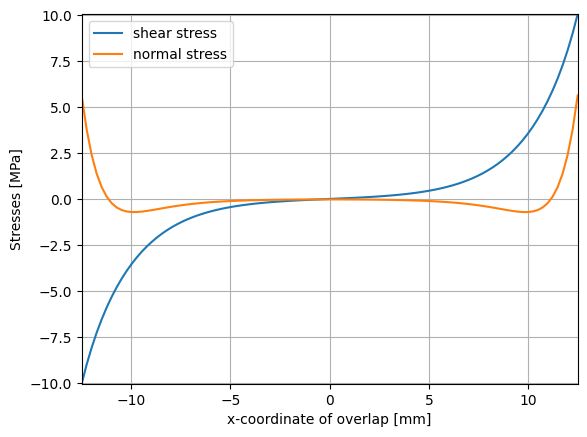

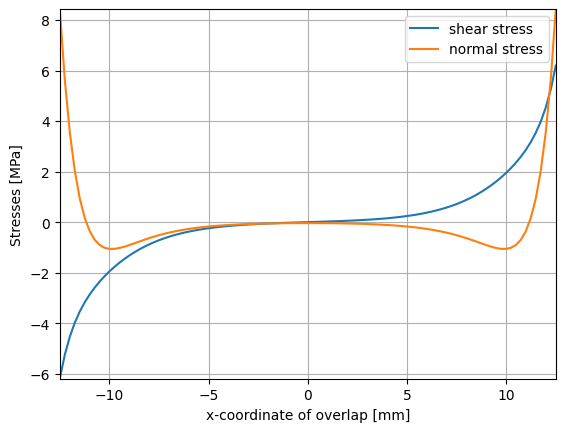

In [24]:
# Geometrie der Sandwich-Layer
h1 = 2.
h2 = 2.
t = 0.2
b = 10.
L0 = 25.

#Werkstoffeigenschaften Adherend1

E_Adherend1 = 210000
nu_Adherend1 = 0.3
Adherend1 = Materials.Material_Adherend("Adherend", E_Adherend, nu_Adherend)

# 0/90 Doppler:
# ABDMatrix des Adherend
Adherend1.M = [145787, 62839.3, 48595.8, 4423.1*4, 0.86]

#Werkstoffeigenschaften Adherend2

Adherend2 = Materials.Material_Adherend("Adherend", E_Adherend1, nu_Adherend1)

# ABDMatrix des Adherend
Adherend2.computeABD_isotrop(h2)


#Werkstoffeigenschaften Adhesive
E_Adhesive = 3900
nu_Adhesive = 0.36
Adhesive = Materials.Material_Adhesive("AVR", E_Adhesive, nu_Adhesive)

# Schnittkräfte 
#SF = [N11, V11, M11,   N12, V12, M12,   N21, V21, M21,   N22, V22, M22]
SF = [0, 0 , 0,   0, 0, 0,   3000 / b , 0, 0,   3000 / b, 0, 0]

# Sandwich-Layer definieren (Höhe Adherend1 Höhe Adhernd2, Höhe Klebschicht, Überlappungslänge, Breite, Schnittkräfte, Adherend1, Adherend2, Adhesive)
Sand1 = Sandwich.Sandwich_Layer(h1, h2, t, L0, b, SF, Adherend1, Adherend2, Adhesive)

# Berechnen der Spannungverteilung (Schnittkräfte, Überlappungslänge, Point of interest, Seite des Point of interest (True= Links; False= Rechts), Daten überschreiben (True, False))
Sand1.linearelasticsandwich_stress(SF, L0, 0, True, True)

#Ausgabe der Spannungsverteilung als plot
Sand1.Sol.plot_stress()

# 90/0 Doppler:
Adherend1.M = [145787, -62839.3, 48595.8, 4423.1*4, 0.86]

# Sandwich-Layer definieren (Höhe Adherend1 Höhe Adhernd2, Höhe Klebschicht, Überlappungslänge, Breite, Schnittkräfte, Adherend1, Adherend2, Adhesive)
Sand1 = Sandwich.Sandwich_Layer(h1, h2, t, L0, b, SF, Adherend1, Adherend2, Adhesive)

# Berechnen der Spannungverteilung (Schnittkräfte, Überlappungslänge, Point of interest, Seite des Point of interest (True= Links; False= Rechts), Daten überschreiben (True, False))
Sand1.linearelasticsandwich_stress(SF, L0, 0, True, True)

#Ausgabe der Spannungsverteilung als plot
Sand1.Sol.plot_stress()
